In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('titanic.csv')

In [8]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.shape

(891, 15)

In [13]:
# sns.histplot(df)

<AxesSubplot:>

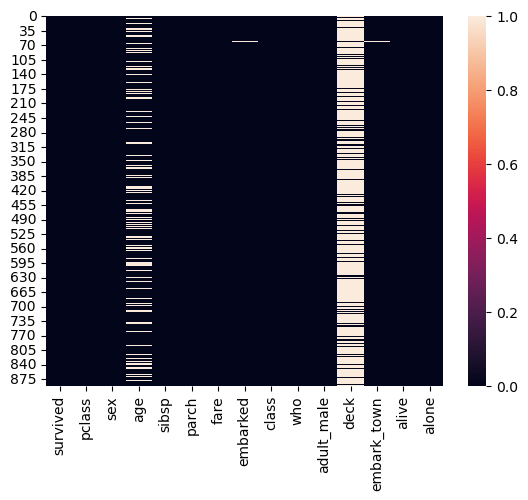

In [15]:
sns.heatmap(df.isnull())

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
df.dropna().shape

(182, 15)

In [18]:
df.shape

(891, 15)

In [20]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


# impute mean to the data set

<AxesSubplot:xlabel='age', ylabel='Count'>

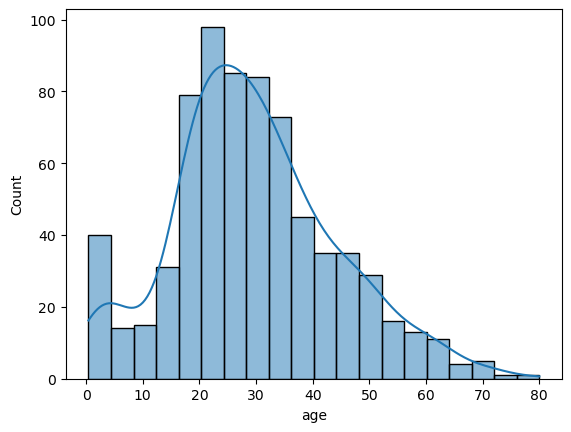

In [24]:
sns.histplot(df['age'],kde=True)

In [25]:
df['age'].mean()

29.69911764705882

In [27]:
df['age_mean'] = df['age'].fillna(df['age']).mean()

In [28]:
df[['age_mean','age']]

,age_mean,age
0,29.699118,22.0
1,29.699118,38.0
2,29.699118,26.0
3,29.699118,35.0
4,29.699118,35.0
...,...,...
886,29.699118,27.0
887,29.699118,19.0
888,29.699118,NaN
889,29.699118,26.0


In [29]:
df['age_mean'] = df['age'].fillna(df['age'].mean())

In [31]:
df[['age_mean','age']]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<AxesSubplot:xlabel='age_mean', ylabel='Count'>

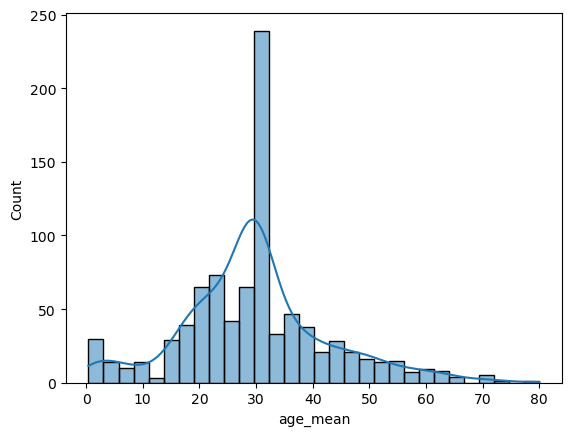

In [33]:
sns.histplot(df['age_mean'],kde=True)

# Use Median value if the data have some outliers

<AxesSubplot:>

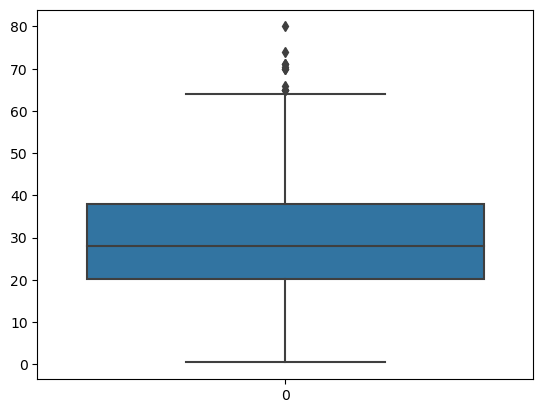

In [34]:
sns.boxplot(df['age'])

<AxesSubplot:>

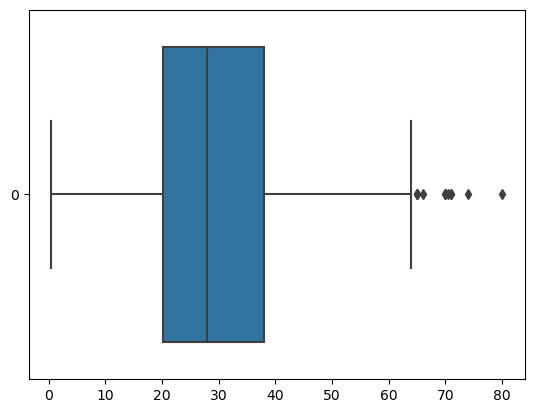

In [40]:
sns.boxplot(df['age'],orient = "h" )

In [41]:
df['age'].median()

28.0

In [42]:
df['age_median'] = df['age'].fillna(df['age'].medianan())

In [43]:
df[['age_median','age']]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


# # If we need to fil categorical values then we should go for Mode

In [45]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

In [47]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [48]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [50]:
etown = df['embark_town'].mode()

In [51]:
etown

0    Southampton
Name: embark_town, dtype: object

In [54]:
df['mode_etown'] = df['embark_town'].fillna(df['embark_town'].mode())

In [55]:
df[['mode_etown','embark_town']]

,mode_etown,embark_town
0,Southampton,Southampton
1,Cherbourg,Cherbourg
2,Southampton,Southampton
3,Southampton,Southampton
4,Southampton,Southampton
...,...,...
886,Southampton,Southampton
887,Southampton,Southampton
888,Southampton,Southampton
889,Cherbourg,Cherbourg


In [59]:
df['mode_etown'].isnull().sum()

2

In [60]:
df['mode_etown'] = df['embark_town'].fillna(etown)

In [61]:
df['mode_etown'].isnull().sum()

2

In [66]:
df[df['embark_town'].notna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,mode_etown
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0,Cherbourg


In [65]:
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median,mode_etown
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,NaN


In [69]:
df[df['embark_town'].notna()]['embark_town'].mode()[0]

'Southampton'

In [70]:
mode=df[df['embark_town'].notna()]['embark_town'].mode()[0]

In [72]:
mode

'Southampton'

In [73]:
df['mode_etown'] = df['embark_town'].fillna(mode)

In [74]:
df['mode_etown'].isnull().sum()

0

In [75]:
df[['mode_etown','embark_town']]

,mode_etown,embark_town
0,Southampton,Southampton
1,Cherbourg,Cherbourg
2,Southampton,Southampton
3,Southampton,Southampton
4,Southampton,Southampton
...,...,...
886,Southampton,Southampton
887,Southampton,Southampton
888,Southampton,Southampton
889,Cherbourg,Cherbourg
